ETAPAS DE UM ALGORITMO GENÉTICO

Inicialização: a população inicial de indivíduos é criada, as soluções (indivíduos) serão geradas (e no caso da roterização serão as coordenadas das cidades) e representa uma possível solução para o problema, de forma que cada inidivíduo seja diferente dos outros e de forma aleatória.

Cálculo da Fitness: cálculo das distâncias, atribui um valor numérico a cada indivíduo da população, indicando quão "boa" é a solução representada por esse indivíduo. Em geral, quanto maior o valor da função de fitness, melhor a solução.

Seleção: são selecionados os indíviduos com base no cálculo da fitness, para reprodução e formação da próxima geração. Existem várias técnicas de seleção, como seleção por roleta, seleção por torneio, etc.

Mutação: Gera novas populações a partir da população anterior para gerar novos resultados e apresentar uma melhor solução existente encontrada.

TIPOS DE SELEÇÃO

Seleção por Roleta (Roulette Wheel Selection): Este método atribui probabilidades de seleção a cada indivíduo proporcionalmente à sua aptidão. Indivíduos mais aptos têm maior probabilidade de serem escolhidos, mas não garantem a seleção. É um equilíbrio entre exploração e explotação.

Seleção por Torneio (Tournament Selection): Nesse método, vários indivíduos são escolhidos aleatoriamente da população, e o indivíduo com a melhor aptidão entre eles é selecionado como pai. É mais determinístico do que a seleção por roleta e permite controlar a pressão seletiva.

Seleção por Elitismo (Elitism Selection): Este método seleciona os melhores indivíduos da população atual e os transfere diretamente para a próxima geração sem modificação. Isso garante que os melhores indivíduos não sejam perdidos durante a evolução.

Seleção por Ranking (Rank Selection): Aqui, os indivíduos são classificados com base em sua aptidão e, em seguida, são selecionados com base em seu ranking. Pode ser mais estável em comparação com a seleção por roleta, uma vez que a probabilidade de seleção não depende diretamente da aptidão.

Seleção por Proporcionalidade Linear (Linear Proportional Selection): Neste método, a probabilidade de seleção de cada indivíduo é linearmente proporcional à sua aptidão. É semelhante à seleção por roleta, mas com uma distribuição linear.

Exercício: Roterização - 131 cidades

Número de indivíduos da população: 50

Número de gerações: 2000

Tipo de seleção: Por roleta

Probabilidade de mutação: 0.07


Melhor resultado encontrado:

Distância total da melhor rota: 1101.365524741861

Duração - 47,1 segundos

Funções

Ler o arquivo

In [1]:
import matplotlib.pyplot as plt
import random
import math

# Função para ler as coordenadas dos pontos do arquivo TSP
def ler_arquivo_tsp(nome_arquivo):
    pontos = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_pontos = False
        for linha in arquivo:
            linha = linha.strip()
            if lendo_pontos:
                if linha == "EOF":
                    break
                numero, x, y = map(float, linha.split())
                pontos.append((x, y))
            elif linha == "NODE_COORD_SECTION":
                lendo_pontos = True
    return pontos

Plotar os pontos

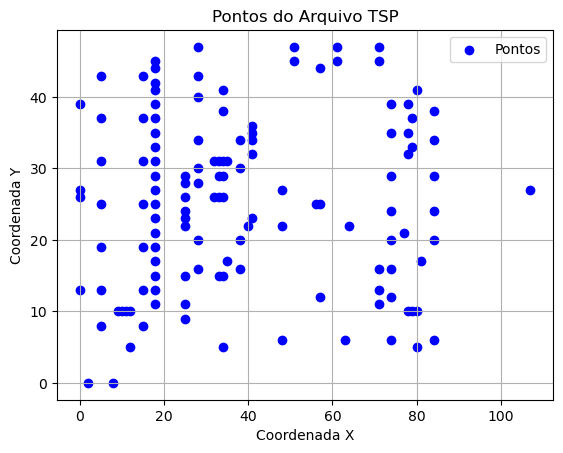

In [1]:
import matplotlib.pyplot as plt

def ler_arquivo_tsp(arquivo_novo):
    pontos = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_pontos = False
        for linha in arquivo:
            linha = linha.strip()
            if lendo_pontos:
                if linha == "EOF":
                    break
                numero, x, y = map(float, linha.split())
                pontos.append((x, y))
            elif linha == "NODE_COORD_SECTION":
                lendo_pontos = True
    return pontos

def plotar_pontos(pontos):
    x, y = zip(*pontos)
    plt.scatter(x, y, marker='o', color='b', label='Pontos')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Pontos do Arquivo TSP')
    plt.legend()
    plt.grid(True)
    plt.show()

# Nome do arquivo TSP
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas dos pontos
pontos = ler_arquivo_tsp(nome_arquivo)

# Plotar os pontos em um gráfico
plotar_pontos(pontos)

Etapa: Inicialização

In [2]:
# Função para inicializar a população com rotas aleatórias
def initialize_population(num_individuals, points):
    population = []
    num_cities = len(points)
    
    for _ in range(num_individuals):
        # Embaralhe aleatoriamente a ordem das cidades
        city_order = list(range(num_cities))
        random.shuffle(city_order)
        
        # Crie uma rota com base nas coordenadas das cidades
        route = [points[i] for i in city_order]
        
        population.append(route)
    
    return population

Etapa: Cálculo da Fitness

In [3]:
# Função para calcular a distância euclidiana entre duas cidades
def calcular_distancia_euclidiana(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Função para calcular a distância total de uma rota
def calcular_distancia_total(rota):
    distancia_total = 0
    num_cidades = len(rota)
    for i in range(num_cidades - 1):
        distancia_entre_cidades = calcular_distancia_euclidiana(rota[i], rota[i + 1])
        distancia_total += distancia_entre_cidades
    # Adicione a distância de volta à primeira cidade para fechar o ciclo
    distancia_total += calcular_distancia_euclidiana(rota[-1], rota[0])
    return distancia_total

Etapa: Seleção

In [4]:
# Função para realizar a seleção de roleta para escolher pares de rotas
def selecao_roleta(populacao, fitness_values):
    total_fitness = sum(fitness_values)
    probabilidades = [fitness / total_fitness for fitness in fitness_values]
    return random.choices(populacao, weights=probabilidades, k=2)

Etapas: Cruzamento e Mutação

In [13]:
# Função para realizar o cruzamento (recombinação) entre duas rotas
def cruzamento(rota1, rota2):
    num_cities = len(rota1)
    start = random.randint(0, num_cities - 1)
    end = random.randint(start, num_cities - 1)
    child = [None] * num_cities
    for i in range(start, end + 1):
        child[i] = rota1[i]
    j = 0
    for i in range(num_cities):
        if child[i] is None:
            while rota2[j] in child:
                j += 1
            child[i] = rota2[j]
    return child

# Função para realizar mutação em uma rota
def mutacao(rota):
    # Troque aleatoriamente duas cidades na rota
    num_cities = len(rota)
    index1, index2 = random.sample(range(num_cities), 2)
    rota[index1], rota[index2] = rota[index2], rota[index1]


# Função para substituir as rotas menos aptas na população
def substituicao(populacao, novas_rotas):
    # Calcule as aptidões das novas rotas
    novas_fitness_values = [1 / calcular_distancia_total(rota) for rota in novas_rotas]
    
    # Substitua algumas das rotas menos aptas pelas novas rotas
    for i in range(len(populacao)):
        if novas_fitness_values[i] > fitness_values[i]:
            populacao[i] = novas_rotas[i]

Aplicação das funções

Melhor rota encontrada: [(8.0, 0.0), (5.0, 8.0), (10.0, 10.0), (15.0, 13.0), (74.0, 24.0), (77.0, 21.0), (84.0, 29.0), (84.0, 38.0), (71.0, 47.0), (71.0, 45.0), (74.0, 35.0), (78.0, 32.0), (79.0, 33.0), (79.0, 37.0), (78.0, 35.0), (78.0, 39.0), (80.0, 41.0), (84.0, 34.0), (84.0, 24.0), (84.0, 20.0), (107.0, 27.0), (84.0, 6.0), (80.0, 5.0), (80.0, 10.0), (81.0, 17.0), (71.0, 13.0), (48.0, 27.0), (28.0, 30.0), (5.0, 31.0), (15.0, 37.0), (18.0, 42.0), (18.0, 41.0), (18.0, 33.0), (18.0, 23.0), (28.0, 20.0), (48.0, 6.0), (63.0, 6.0), (57.0, 12.0), (41.0, 36.0), (41.0, 35.0), (41.0, 32.0), (34.0, 29.0), (33.0, 29.0), (32.0, 31.0), (25.0, 22.0), (18.0, 13.0), (0.0, 26.0), (0.0, 27.0), (5.0, 25.0), (15.0, 31.0), (15.0, 43.0), (18.0, 45.0), (18.0, 44.0), (28.0, 34.0), (34.0, 31.0), (35.0, 31.0), (38.0, 30.0), (41.0, 34.0), (51.0, 45.0), (57.0, 44.0), (61.0, 45.0), (57.0, 25.0), (48.0, 22.0), (38.0, 16.0), (35.0, 17.0), (34.0, 15.0), (34.0, 5.0), (18.0, 11.0), (15.0, 8.0), (12.0, 10.0), (11.0, 1

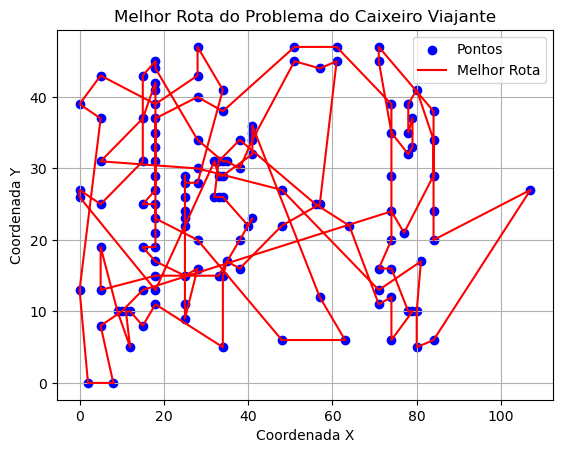

In [17]:
# Nome do arquivo TSP
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas dos pontos
pontos = ler_arquivo_tsp(nome_arquivo)

# Tamanho da população inicial para o algoritmo genético
num_individuals = 50

# Inicializar a população
populacao = initialize_population(num_individuals, pontos)

# Número de gerações
num_geracoes = 2000

for geracao in range(num_geracoes):
    # Calcular a fitness para cada rota na população
    fitness_values = [1 / calcular_distancia_total(rota) for rota in populacao]

    # Seleção e cruzamento
    novas_rotas = []
    for _ in range(num_individuals // 2):
        rota1, rota2 = selecao_roleta(populacao, fitness_values)
        filho1 = cruzamento(rota1, rota2)
        filho2 = cruzamento(rota2, rota1)
        novas_rotas.extend([filho1, filho2])

    # Mutação
    for rota in novas_rotas:
        if random.random() < 0.07:  # Probabilidade de mutação
            mutacao(rota)

    # Substituição
    substituicao(populacao, novas_rotas)

# Encontre a melhor rota na população final
melhor_rota = min(populacao, key=calcular_distancia_total)

print("Melhor rota encontrada:", melhor_rota)
print("Distância total da melhor rota:", calcular_distancia_total(melhor_rota))

# Plotar os pontos e a melhor rota
x, y = zip(*melhor_rota)
plt.scatter(x, y, marker='o', color='b', label='Pontos')
plt.plot(x + (x[0],), y + (y[0],), linestyle='-', color='r', label='Melhor Rota')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Melhor Rota do Problema do Caixeiro Viajante')
plt.legend()
plt.grid(True)
plt.show()
